In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# reflect an existing database into a new model
#to connect to our SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")
#In order for your code to function properly
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table, In order to reference a specific class do the following
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

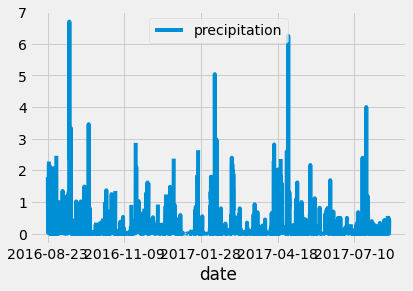

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())   #will show the results from above
#9.2.1
#Since we only want to see the most recent data, we need to filter out all 
#of the data that is older than a year from the last record date
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
#we'll add a function that extracts all of the results from our query and put them in a list. 
#To do this, add .all() to the end of our existing query.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

#In order to save our results as a DataFrame, we need to provide our results 
#variable as one parameter and specify the column names as our second parameter.
df = pd.DataFrame(results, columns=['date','precipitation'])

#By setting inplace=True, we're saying that we do not want to create a new DataFrame with the modified specifications.
#If we set it to "False," then we would create a new DataFrame.
df.set_index(df['date'], inplace=True)
# First we'll convert the DataFrame to strings, and then we'll set our index to "False." 
#This will allow us to print the DataFrame without the index. 9.2.2
#      print(df.to_string(index=False))

# Sort the dataframe by date 9.2.3
#Since we set our index to the date column previously, we can use our new index to sort our results
df = df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# How many stations are available in this dataset?
#9.3.1
#Begin by adding the starting point for our query, which is the following line:
session.query(func.count(Station.station)).all()
#Now we need to add the .all() function to the end of this query so that our results are returned as a list.

[(9)]

In [32]:
# What are the most active stations? --> group_by
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
#This function will order our results in the order that we specify. 
#Our query results will be returned as a list. --> all()
# List the stations and the counts in descending order. --> .order_by()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
#9.3.3
#find the min,max,avg of the filtered station 
session.query(func.min(Measurement.tobs),\
func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station == 'USC00519281').all()
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

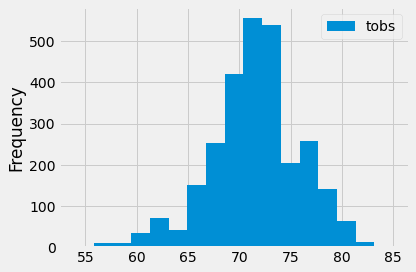

In [54]:
#9.3.4 - Choose the station with the highest number of temperature observations. --> USC00519281
results = session.query(Measurement.tobs)\
.filter(Measurement.station == 'USC00519281').all()
#print(results)
#To make the results easier to read, understand, and use, we'll put them in a DataFrame.
df = pd.DataFrame(results, columns=['tobs'])
#print(df)
#make the data into a histagram 
df.plot.hist(bins=17)
plt.tight_layout()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [15]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge